In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Local
from evaluation_classes import RecordedPath, TaskPath, PathPlotter, HLCPath
from evaluation_tools import PATHTYPES

In [2]:
# %matplotlib notebook

In [3]:
tp1 = TaskPath(
    path_to_taskfile__="Binyamina/Block_8_1001.json",
    path_name_="Task_Biny_B8_10jan",
    plot_format_='x')

origin = tp1.get_first_waypoint()
lat_og, lon_og = origin[0], origin[1]
tp1.define_origin_coordinates(origin[0], origin[1])

json task loaded | 396 waypoints loaded

TaskPath instance created
Origin coordinates set to (32.50947063, 34.93604071)


In [4]:
hlc_path = HLCPath(path_to_csv_="task_CSVs/block8_GEO_PATH.csv", path_name_="hlc_block8_GEO_PATH", plot_format_='x')
hlc_path.define_origin_coordinates(lat_=lat_og, lon_=lon_og)
hlc_path.set_returntype_forplot(PATHTYPES.HIGHRES_PATH)

path set with (427, 2) waypoints
PATHTYPE not defined yet
HLCPath 'hlc_block8_GEO_PATH' created
Origin coordinates set to (32.50947063, 34.93604071)


In [5]:
a=hlc_path.get_localpath_for_plot()

In [6]:
rp1 = RecordedPath(path_to_recordfile_="Executions/Binyamina/24.01.22/Block8_2401_1130.csv", path_name_ = "24-01 11:30", plot_format_='--')
rp1.define_origin_coordinates(lat_=lat_og, lon_=lon_og)

'Executions/Binyamina/24.01.22/Block8_2401_1130.csv' loaded in 0.0211 seconds to path 24-01 11:30
RecordedPath '24-01 11:30' created
Origin coordinates set to (32.50947063, 34.93604071)


In [7]:
pp = PathPlotter()


PathPlotter instance created


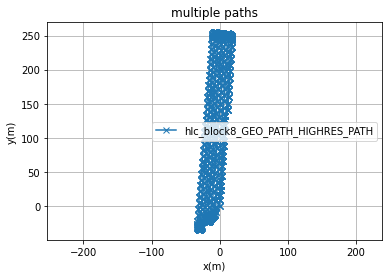

In [8]:
tp1._set_plot_format('o')
# hlc_path._set_plot_format('x')
rp1._set_plot_format('-x')
pp.plot_paths([hlc_path], "multiple paths")
# pp.plot_paths([tp1, hlc_path, rp1], "multiple paths")